In [8]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_classes = 3

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.layers[0].trainable = False

my_new_model.summary()

2023-02-17 01:46:52.382867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-17 01:46:52.382903: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-17 01:46:52.382925: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sky-Modern-14-A10M): /proc/driver/nvidia/version does not exist
2023-02-17 01:46:52.383232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

path = '/home/sky/Desktop/god-classification/dataset/'
# Training directory
train_dir = os.path.join(path,'Train')
print(train_dir)

# Validation directory
val_dir = os.path.join(path,'Val')
print(val_dir)

train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=4,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        val_dir,
        target_size=(image_size, image_size),
        batch_size=2,
        class_mode='categorical')



/home/sky/Desktop/god-classification/dataset/Train
/home/sky/Desktop/god-classification/dataset/Val
Found 150 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [32]:
for i in range(5):
    print("Epoch : ",i+1)
    loss_history += [my_new_model.fit_generator(train_generator, steps_per_epoch=4,
                         validation_data=validation_generator, validation_steps=2)]


Epoch :  1


/tmp/ipykernel_9188/2922417473.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history += [my_new_model.fit_generator(train_generator, steps_per_epoch=4,


4/4 [==============================] - 1s 346ms/step - loss: 0.2420 - accuracy: 0.8750 - val_loss: 0.3101 - val_accuracy: 0.7500
Epoch :  2
4/4 [==============================] - 1s 384ms/step - loss: 0.2802 - accuracy: 0.8750 - val_loss: 0.5679 - val_accuracy: 0.7500
Epoch :  3
4/4 [==============================] - 1s 333ms/step - loss: 0.0698 - accuracy: 0.9286 - val_loss: 0.3429 - val_accuracy: 0.7500
Epoch :  4
4/4 [==============================] - 1s 355ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 1.2316 - val_accuracy: 0.7500
Epoch :  5
4/4 [==============================] - 1s 330ms/step - loss: 0.0676 - accuracy: 0.9375 - val_loss: 1.2086 - val_accuracy: 0.5000


Text(0.5, 1.0, 'Accuracy')

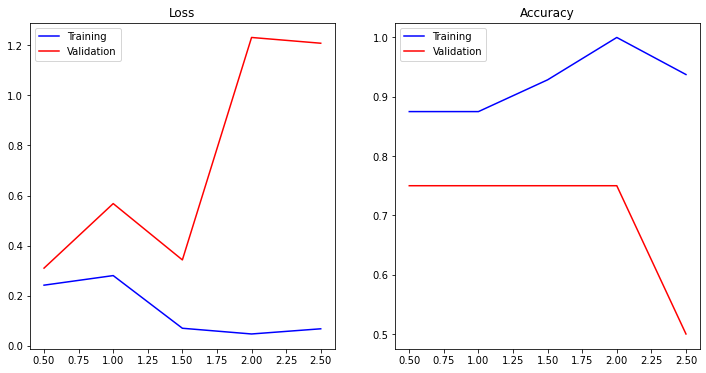

In [34]:
epich = np.cumsum(np.concatenate(
    [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['accuracy'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_accuracy'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')

In [ ]:
#my_new_model.save("/home/sky/Desktop/god-classification/res_model10.h5")